 #          Creating a Pairs Selection algorithm using Machine Learning
 
This is my first project on github. This is also my first project in python and the first time using the Notebook of Jupyter. The project is designed to be replicable by the user, and acompanying datasets can be found in the repository.

  This algorithm is based on the framework proposed by Simao Moraes Sarmento and Nuno Horta in their white paper titled _Enhancing a Pairs Trading strategy with the application of Machine Learning_ 
 
I look forward to any feedback and welcome potential collaberation: 
 kaalvoetranger@gmail.com
 
 ### This project contains 7 sections. 
 
  - 0. Install and Import Dependancies
  - 1. Read in and Validate Data
  - 2. Dimension Reduction and PCA
  - 3. Unsupervised Learning 
  - 4. Pairs Selection Criterea
  - 5. Conclusions and most hedgable example
  - 6. Further Considerations
  

  
  
 

In [1]:
import warnings;
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

## 0. Install and Import Dependancies

These are all the packages we are going to use to make our pairs selection.

In [2]:
%%capture --no-stderr
!pip install yfinance             # This downloads and installs the Y Finance Module

In [10]:
        """ Main Dependancies """
import yfinance as yf                 
import pandas as pd
import numpy as np

        """ Dimension Reduction and Classifiers """
from statsmodels.tsa.stattools import adfuller
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from scipy.cluster.vq import kmeans, vq
from scipy.cluster.hierarchy import linkage, fcluster


        """ Model Metrics """
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error as MSE

        """ Don't Forget to Make Pretty! """
    
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1. Read in Data and validate for PCA

The list of Tickers comes from a list called _Top 2000 Valued Companies_ by Maria L. Edlin and was compiled for a stock-market game at the university of Nebraska. 

**This collects the most recent year's daily closing values for roughly 200 companies. Each of these companies has a market cap of over $3,000,000 and is actively traded**

The validated dataset is also available in the github repository as _"analysis_dataset.csv"_

In [11]:
# a list of roughly 200 tickers. 

tickerStrings = ['AA','AAPL','ABT','ACL','ADP','AEG','AIG','ALL','AMAT',\
                 'AMGN','AMX','AXP','AZ','AZN','BA','BAC',\
                 'BCS','BEN','BHP','BMO','BMY','BNS','BP','BR','BRG',\
                 'BTI','BUD','C','CAH','CAJ','CAT','CCL','CEO','CL','CMCSA','CNQ','COP',\
                 'CSCO','CSR','CVX','D','DB','DCM','DD','DELL','DEO','DIS','DNA','DOW','DT',\
                 'DUK','DVN','E','EBAY','EMC','EMR','EXC','FDX',\
                 'GE','GILD','GLW','GOOG','GS','GSK','HAL','HBC','HD','HMC','HON','HPQ','IBM',\
                 'ING','INTC','JNJ','JPM','KB','KEP','KMB','KO','LLY','LMT','LOW','LYG','MBT',\
                 'MC','MCD','MDT','MET','MFC','MMM','MO','MRK','MRO','MS','MSFT',\
                 'NEM','NGG','NMR','NOK','NSANY','NVS','ORCL','OXY','PBR',\
                 'PEP','PFE','PG','PHG','PRU','QCOM','RIG','RIO',\
                 'RY','S','SAP','SGP','SI','SLB','SNE','SNY','SO','SPY','SSL','STA','STD','STI','STO',\
                 'SU','SZE','T','TD','TEF','TEM','TEVA','TGT','TI','TM','TOT','TSM','TWX','TXN','TYC',\
                 'UBS','UL','UN','UNH','UPS','USB','UTX','V','VIA/B','VLO','VOD','VZ','WAG','WB','WBK',\
                 'WFC','WLP','WM','WMT','WYE','XOM','YHOO',\
                 'POM','SVU','IPG','PBCT','MDU','CIG','TKS','MYL','USG','SHY','GTK',\
                 'XRAY','PNW','GLG','BLL','TRH','PDS','BF/A','LAMR','ASX','FII','MKTAY',\
                 'ROST','CEPH','ISIL','LNCR','ARW','ALV','SWK','NVT','CZN','SEIC','TAC','IJR','HP',\
                 'NYT','ACV','AMR','AIV','HSIC','DISCA','ETP','SFI','GPN','BYD','AEOS','MTL','PPDI',\
                 'LRY','BRO','CNP','ACGL','ACF','EMN','MLM','NVLS','ATVI','DST','NRG','MFE','ALD',\
                 'PNR','BNL','RRC','TSS','PMI','ACAS','TAP','CNB','MICC','KWK','BVN','IJD','ENDP',\
                 'VRTX','HAS','NOVL','HCP','SVM','LOGI','XEC','MDR','EV','FDO','LIZ','BEC','CPS','CNO',\
                 'CYN','JBHT','BDM','ORLY','EAS','WPI','JNY','IVGN','TRZ','CXG','BC','OSK','TSN','WTR']

# iterating through the ticker string and donloading data for each ticker
df_list = list()
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker", period='1y')
    data['ticker'] = ticker  # add this column because the dataframe doesn't contain a column with the ticker
    df_list.append(data)

# combine all dataframes into a single dataframe and drop unnessessary columns
df = pd.concat(df_list)
df2 = df.drop(['Open','High','Low','Adj Close'], axis=1)
# save to csv
df2.to_csv('full_dataset.csv')

# getting summary of total number of tickers downloaded successfully
df_summary1 = df2.drop_duplicates(subset='ticker', keep = 'last', inplace = False)

print("Number of Shares for sample: {}".format(len(df_summary1)))


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [12]:
# converting the full ticker data into usable format for analysis with pandas
df3 = df2.drop('Volume', axis=1)
analysis_dataset = df3.pivot(columns = 'ticker', values = 'Close')

# save to csv
analysis_dataset.to_csv('analysis_dataset.csv')

# example of dataset head. It has around 204 features and 254 observations for each entry.
#display(analysis_dataset.head())
display(analysis_dataset.info())



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-04-29 to 2022-04-28
Columns: 205 entries, AA to XRAY
dtypes: float64(205)
memory usage: 407.2 KB


None

## 2. Dimension Reduction and PCA

Now that we have our analysis dataset, we are going to manipulate the data so that our statistical assumptions hold true. In this step we are going to:

 - calculate the normalised returns for each price series
 - Check for stationarity
 - Generate correlation matrix
 - Perform PCA
 - Generate loadings plots



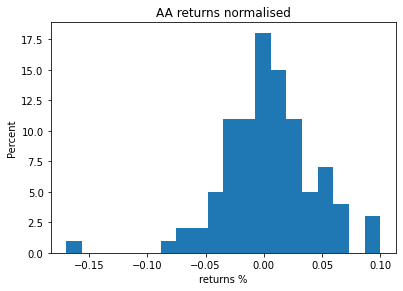

In [14]:
# calculating normalized return series for each ticker price series
df_returns = analysis_dataset.pct_change()
df_returns2 = df_returns.dropna()


# plotting an example to visually check transformation was successful
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
df_returns2['AA'].plot.hist(bins = 20)
ax1.set_xlabel("returns %")
ax1.set_ylabel("Percent")
ax1.set_title("AA returns normalised")
plt.show()

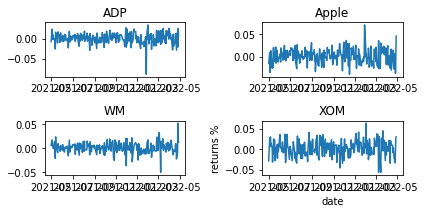

In [16]:
# plotting a few of the ticker returns series to visually see if our series are normalized
fig = plt.figure()
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax1.plot(df_returns2['ADP'])
ax1.set_title("ADP")
ax2.plot(df_returns2['AAPL'])
ax2.set_title("Apple")
ax3.plot(df_returns2['WM'])
ax3.set_title("WM")
ax4.plot(df_returns2['XOM'])
ax4.set_title("XOM")
plt.xlabel('date')
plt.ylabel('returns %')
plt.tight_layout()
plt.show()


We can visually confirm that these samples from our dataset are now normally distributed. We move on to perform further statistical tests and remove any ticker series that does not meet our assumptions.

### Testing for Stationarity using the ADF test

The null hypothesis of the Augmented Dickey-Fuller test, states that the time series can be represented by a “unit root”, (i.e. it has some time dependent structure). Rejecting this null hypothesis means that the time series is stationary. If the ADF test statistic is < -4 then we can reject the null hypothesis - i.e. we have a stationary time series.





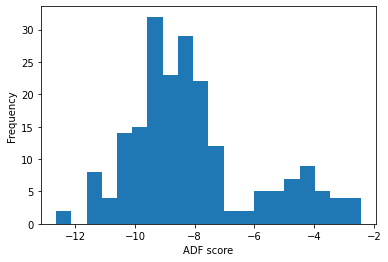

In [18]:
df_set = df_returns2.apply(lambda x: adfuller(x), axis=0)
df_set.iloc[0,:].plot.hist(bins = 20)
plt.xlabel('ADF score')
plt.show()

We can see from the plot above that most of our series are stationary. There are about 13 stocks that still show autocorrelation and so we will remove these from the data before calculating covariances:

In [60]:
#print(df_set)

data2 = df_set.drop(labels=range(1, 6), axis=0)
data3 = data2.unstack()
data4 = data3[data3 >= -4]

dropem_tupes = data4.index.to_list()
dropem_list = [item[0] for item in dropem_tupes]

print(dropem_list)

df_returns3 = df_returns2.drop(columns=dropem_list)
print(df_returns3.shape)

['ACL', 'AEG', 'AMX', 'CPS', 'CYN', 'DB', 'DCM', 'DISCA', 'GLG', 'ING', 'LYG', 'QCOM', 'VOD']
(96, 192)


Now that we have removed these stocks we have 192 that we calculate covariences on. 

### Generating covariance matrix:

In [65]:
covMatrix = np.cov(df_returns3)
